In [92]:
import itertools
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as ml
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [20]:
blobs2_dataset = pd.read_csv("../datasets/blobs2.csv")
blobs2_labels = blobs2_dataset['label'].values
blobs2_points = blobs2_dataset.drop(['label'], axis=1).values


In [122]:
def x_axis(arr):
    return arr[:, 0]

def y_axis(arr):
    return arr[:, 1]

def get_svm(points, labels, kernel, degree):
    svm = SVC(kernel=kernel, degree=degree, gamma='scale', probability=True)
    svm.fit(points, labels)
    return svm


def get_points_between(arr, num=500):
    return np.linspace(np.min(arr), np.max(arr), num)

def sup_vectors_plot(svm):
    plt.scatter(x_axis(svm.support_vectors_), y_axis(svm.support_vectors_), s=40, c='k', marker='x')
    
def points_plot(points, labels):
    plt.scatter(x_axis(points), y_axis(points), c=labels, cmap=plt.cm.Paired, s=10)

def tight_plot(points):
    plt.xlim(np.min(x_axis(points)), np.max(x_axis(points)))
    plt.ylim(np.min(y_axis(points)), np.max(y_axis(points)))
    
def show_separating_plane(points, svm):
    x_points = get_points_between(x_axis(points))
    y_points = get_points_between(y_axis(points))
    covering_grid = np.array([point for point in itertools.product(x_points, y_points)])
    result_line = covering_grid[np.abs(x_axis(svm.predict_proba(covering_grid)) - 0.5) < 0.01]
    plt.scatter(x_axis(result_line), y_axis(result_line), s=1, c='k')


def show_svm(points, labels, svm):
    tight_plot(points)
    
    sup_vectors_plot(svm)
    points_plot(points, labels)
    
    show_separating_plane(points, svm)

    plt.show()
    

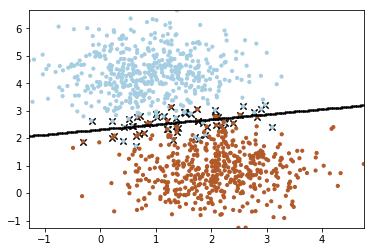

In [123]:
show_svm(blobs2_points, blobs2_labels, get_svm(blobs2_points, blobs2_labels, "linear", 2))


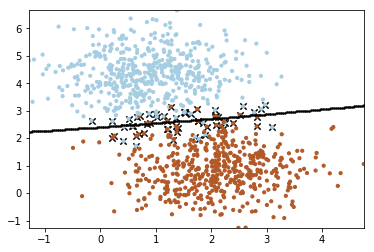

In [124]:
show_svm(blobs2_points, blobs2_labels, get_svm(blobs2_points, blobs2_labels, "poly", 2))


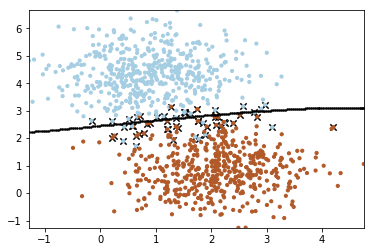

In [125]:
show_svm(blobs2_points, blobs2_labels, get_svm(blobs2_points, blobs2_labels, "poly", 3))


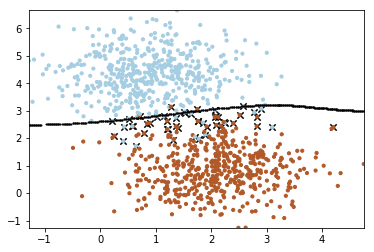

In [126]:
show_svm(blobs2_points, blobs2_labels, get_svm(blobs2_points, blobs2_labels, "poly", 5))


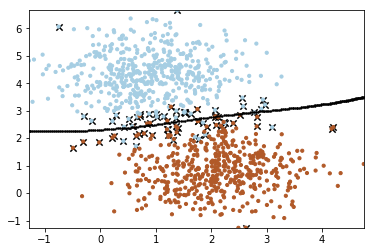

In [127]:
show_svm(blobs2_points, blobs2_labels, get_svm(blobs2_points, blobs2_labels, "rbf", 2))


In [134]:

def svm_time(points_train, labels_train, points_test, labels_test):
    svm = SVC(kernel="linear", gamma='scale')
    start_time = time.time()
    svm.fit(points_train, labels_train)
    print(f'SVM score {svm.score(points_test, labels_test)}, time {time.time() - start_time}')

def forest_time(points_train, labels_train, points_test, labels_test, depth):
    random_forst = RandomForestClassifier(n_estimators=100, max_depth=depth)
    start_time = time.time()
    random_forst.fit(points_train, labels_train)
    print(f'Forest score {random_forst.score(points_test, labels_test)}, time {time.time() - start_time}')
    

In [135]:
cancer_dataset = pd.read_csv("../datasets/cancer.csv")
cancer_labels = [1 if val == 'M' else -1 for val in cancer_dataset['label'].values]
cancer_points = cancer_dataset.drop(['label'], axis=1).values

cancer_points_training, cancer_points_test, cancer_labels_training, cancer_labels_test = ml.train_test_split(cancer_points, cancer_labels, train_size=0.8)



In [130]:
spam_dataset = pd.read_csv("../datasets/spam.csv")
spam_labels = [val for val in spam_dataset['label'].values]
spam_points = spam_dataset.drop(['label'], axis=1).values

spam_points_training, spam_points_test, spam_labels_training, spam_labels_test = ml.train_test_split(spam_points, spam_labels, train_size=0.8)


In [136]:
print("CANCER test")
svm_time(cancer_points_training, cancer_labels_training, cancer_points_test, cancer_labels_test)
forest_time(cancer_points_training, cancer_labels_training, cancer_points_test, cancer_labels_test, 7)


CANCER test
SVM score 0.9473684210526315, time 0.6649644374847412
Forest score 0.956140350877193, time 0.07501697540283203


In [132]:
print("SPAM test")
svm_time(spam_points_training, spam_labels_training, spam_points_test, spam_labels_test)
forest_time(spam_points_training, spam_labels_training, spam_points_test, spam_labels_test, 10)


SPAM test
SVM score 0.9131378935939196, time 166.6677281856537
Forest score 0.9326818675352877, time 0.2661263942718506
